In [61]:
#import external pandas_datareader library with alias of web
#import pandas_datareader as web
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

Gets historical data for #nvda

In [34]:
def getHistoricalData(ticker):

    tickr = yf.Ticker(ticker)
    tickrHist = tickr.history(start="2020-01-01", end="2023-01-01")
    print(tickrHist.head())

    tickrHist.to_csv(f'{ticker}.csv')
    return tickr



In [36]:
ticker = getHistoricalData('SPY')
print(ticker.info)

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00  308.427024  309.713970  307.464193  309.694885   
2020-01-03 00:00:00-05:00  306.158182  308.522348  306.100987  307.349792   
2020-01-06 00:00:00-05:00  305.519487  308.608162  305.395555  308.522369   
2020-01-07 00:00:00-05:00  307.931309  308.427038  307.187745  307.654877   
2020-01-08 00:00:00-05:00  307.855050  310.562386  307.597672  309.294525   

                             Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                         
2020-01-02 00:00:00-05:00  59151200        0.0           0.0            0.0  
2020-01-03 00:00:00-05:00  77709700        0.0           0.0            0.0  
2020-01-06 00:00:00-05:00  55653900        0.0           0.0            0.0  
2020-01-07 00:00:00-05:00  40496400        0.0           0.0          

TypeError: 'method' object is not subscriptable

In [30]:
data = yf.download('SPY AAPL')
data.tail()

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close              \
                                 AAPL         SPY        AAPL         SPY   
Date                                                                        
2023-01-19 00:00:00-05:00  135.270004  388.640015  135.270004  388.640015   
2023-01-20 00:00:00-05:00  137.869995  395.880005  137.869995  395.880005   
2023-01-23 00:00:00-05:00  141.110001  400.630005  141.110001  400.630005   
2023-01-24 00:00:00-05:00  142.529999  400.200012  142.529999  400.200012   
2023-01-25 00:00:00-05:00  141.505005  399.190002  141.505005  399.190002   

                                 High                     Low              \
                                 AAPL         SPY        AAPL         SPY   
Date                                                                        
2023-01-19 00:00:00-05:00  136.250000  391.079987  133.770004  387.260010   
2023-01-20 00:00:00-05:00  138.020004  396.040009  134.220001  388.380005   
2023-01-23 00:00:00-05:00  143.320007  402.649994  137.899994  395.720001   
2023-01-24 00:00:00-05:00  143.160004  401.149994  140.300003  397.640015   
2023-01-25 00:00:00-05:00  141.970001  400.209991  138.809998  393.559998   

                                 Open                Volume              
                                 AAPL         SPY      AAPL         SPY  
Date                                                                     
2023-01-19 00:00:00-05:00  134.080002  389.359985  58280400  86958900.0  
2023-01-20 00:00:00-05:00  135.279999  390.100006  79972200  91544900.0  
2023-01-23 00:00:00-05:00  138.119995  396.720001  81760300  84178800.0  
2023-01-24 00:00:00-05:00  140.309998  398.880005  66435100  59524900.0  
2023-01-25 00:00:00-05:00  140.889999  395.950012  46279002  56295466.0

<AxesSubplot:xlabel='Date'>

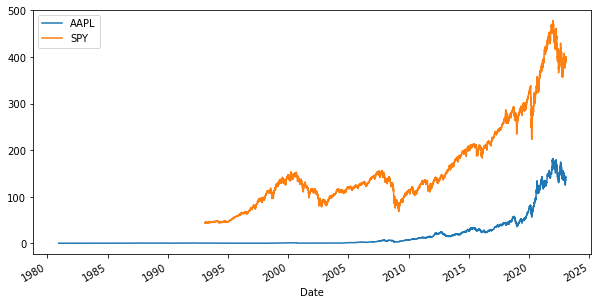

In [24]:
data['Close'].plot(figsize=(10, 5))

In [39]:
# Create a function to generate trading signals

#The Bollinger Bands are then calculated by subtracting the rolling mean from the stock's close price, 
#and dividing the result by two times the rolling standard deviation. 
#If the Bollinger Band value is greater than 1, the function generates a sell signal (-1); 
#if the Bollinger Band value is less than -1, the function generates a buy signal (1); 
#otherwise, the function generates a hold signal (0).

def generate_signals(data):
    signals = []
    for i in range(len(data)):
        if data["Bollinger Band"][i] > 1:
            signals.append(-1)
        elif data["Bollinger Band"][i] < -1:
            signals.append(1)
        else:
            signals.append(0)
    return signals

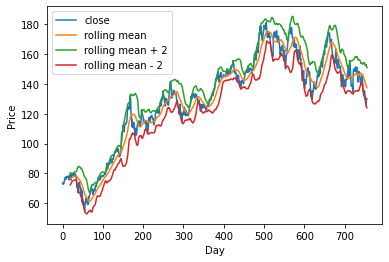

In [68]:
#This strategy is based on the idea that prices will eventually return to their mean, or average, value. 
#The bot will buy when the price is below the average and sell when the price is above the average.

def meanReversionAlg(ticker):
    # Load historical data into a dataframe
    try:
        df = pd.read_csv(f"{ticker}.csv")
    except:
        getHistoricalData(ticker)
        df = pd.read_csv(f"{ticker}.csv")

    # Calculate the rolling mean and standard deviation
    rolling_mean = df["Close"].rolling(window=20).mean()
    rolling_std = df["Close"].rolling(window=20).std()

    # Create a new column for the Bollinger Band
    df["Bollinger Band"] = (df["Close"] - rolling_mean) / (2 * rolling_std)


    # Generate trading signals
    signals = generate_signals(df)
    df["Signals"] = signals

    # Plot the data
    plt.plot(df["Close"], label='close')
    plt.ylabel("Price")
    plt.xlabel("Day")
    plt.plot(rolling_mean, label='rolling mean')
    plt.plot(rolling_mean + 2 * rolling_std, label='rolling mean + 2')
    plt.plot(rolling_mean - 2 * rolling_std, label='rolling mean - 2')
    plt.legend()
    plt.show()
    df["Signals"].to_csv(f"{ticker}_meanrev_signals.csv")
    
meanReversionAlg('AAPl')


In [58]:
# Create a function to generate trading signals

#If RSI value is greater than 70, the function generates a sell signal (-1); 
#if RSI value is less than 30, the function generates a buy signal (1); 
#otherwise, the function generates a hold signal (0).

def generate_RSI_signals(data):
    signals = []
    for i in range(len(data)):
        if data['RSI'][i] > 70:
            signals.append(-1)
        elif data['RSI'][i] < 30:
            signals.append(1)
        else:
            signals.append(0)
    return signals

In [60]:
#RSI is a momentum indicator that compares the magnitude of recent gains to recent 
#losses in order to determine overbought and oversold conditions of an asset.

def momentumTrading(ticker):
    # Load historical data into a dataframe
    try:
        df = pd.read_csv(f"{ticker}.csv")
    except:
        getHistoricalData(ticker)
        df = pd.read_csv(f"{ticker}.csv")

    # Create a new column for the 14-day relative strength index (RSI)
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    df['RSI'] = rsi

    # Generate trading signals
    signals = generate_RSI_signals(df)
    df['Signals'] = signals
    
    df["Signals"].to_csv(f"{ticker}_momentum_signals.csv")

momentumTrading('AAPL')

In [63]:
# Create a function to generate trading signals
def generate_model_signals(data, model):
    signals = []
    for i in range(len(data)):
        if i < len(data) - 1:
            prediction = model.predict(data[i:i+1][["Open", "High", "Low", "Close", "Volume"]])
            if prediction > data["Close"][i]:
                signals.append(1)
            else:
                signals.append(-1)
        else:
            signals.append(0)
    return signals

In [64]:
def algo_trading(ticker):
    try:
        df = pd.read_csv(f"{ticker}.csv")
    except:
        getHistoricalData(ticker)
        df = pd.read_csv(f"{ticker}.csv")


    # Use linear regression to fit a model to the data
    x = df[["Open", "High", "Low", "Close", "Volume"]]
    y = df["Close"]
    model = LinearRegression().fit(x, y)


    # Generate trading signals
    signals = generate_model_signals(df, model)
    df["Signals"] = signals
    df["Signals"].to_csv(f"{ticker}_model_signals.csv")
    
algo_trading('AAPL')


In [77]:
def test(ticker):
    # Load historical data into a dataframe
    try:
        df = pd.read_csv(f"{ticker}.csv")
    except:
        getHistoricalData(ticker)
        df = read_csv(f"{ticker}.csv")

    # Initialize variables for the strategy
    initial_capital = 100000
    positions = pd.read_csv(f"{ticker}_meanrev_signals.csv",usecols="Signals")
    cash = []
    
    print(positions)

    # Iterate through the data and execute trades
    for i in range(len(df)):
        if i == 0:
            cash.append(initial_capital)
        else:

            # Execute trades
            if positions[i] == 1:
                cash.append(cash[i-1] - df['Open'][i])
            elif positions[i] == -1:
                cash.append(cash[i-1] + df['Open'][i])
            else:
                cash.append(cash[i-1])

    # Add the cash and position values to the dataframe
    df['Positions'] = positions
    df['Cash'] = cash

    # Calculate the total value of the portfolio
    df['Total'] = df['Cash'] + df['Open'] * df['Positions']

    # Plot the portfolio value over time
    import matplotlib.pyplot as plt
    plt.plot(df['Total'])
    plt.show()
    
    
test('AAPL')

ValueError: 'usecols' must either be list-like of all strings, all unicode, all integers or a callable.